# Query and Filter data from NeDRex via the Python package

## Familiarize yourself with essential package functions
### Interactive Exercise: Explore the NeDRex node and edge types, and available attributes

Before we start querying data, let's explore some helper functions to navigate the NeDRex knowledge graph:

1. **The first cell just initializes the NeDRex package**
2. **Find the import statement in the second cell** (test all of these imported functions)
3. **Task 1: Find and print the following information**:
    - Task 1.1: What are the available edge and node types?
    - Task 1.2: What are the potential attributes of the "Gene" node type and the "GeneAssociatedWithDisorder" edge type?
    - Task 1.3: Print one example Protein node and PPI edge!
    - Task 1.4: What are the options for main IDs of nodes and edges?

In [1]:
import nedrex
from nedrex.core import get_api_key, get_edge_types, get_node_types, get_collection_attributes

API_LINK = "https://api.nedrex.net/"
nedrex.config.set_url_base(API_LINK)
nedrex.config.set_api_key(get_api_key(accept_eula=True))


In [2]:
#Here are the imported/available nedrex functions, test them a little to answer the questions
from nedrex.core import get_edges, get_nodes, get_edge_types, get_node_types, get_collection_attributes

# Task 1.1 What are the available edge and node types?


# Task 1.2: What are the potential attributes of the "Gene" node type and the "GeneAssociatedWithDisorder" edge type?


# Task 1.3: Print one example Protein node and PPI edge!


# Task 1.4 What are the options for main IDs of nodes and edges?


### 🔍 Solution 1 (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:

Solution 1.1: What are the available edge and node types?
```Python
print(f"Available node types: {get_node_types()}\n")
print(f"\nAvailable edge types: {get_edge_types()}\n")
```

Solution 1.2: What are the potential attributes of the "Gene" node type and the "GeneAssociatedWithDisorder" edge type?
```python
print(f"\nAttributes of gene node: {get_collection_attributes("gene")}\n")
print(f"\nAttributes of gene_associated_with_disorder edge: {get_collection_attributes("gene_associated_with_disorder")}\n")
```

Solution 1.3: Print one example Protein node and PPI edge!
```python
print(f"\nExample node:")
for node in get_nodes("protein", limit=1):
    print(node)

print(f"\nExample edge:")
for edge in get_edges("protein_interacts_with_protein",limit=1):
    print(edge)
```

Solution 1.4: What are the options for main IDs of nodes and edges?
```python
print(get_nodes("protein", limit=1)[0]["primaryDomainId"])

edge1 = get_edges("protein_interacts_with_protein",limit=1)[0]
print(edge["memberOne"], edge["memberTwo"])

edge2 = get_edges("protein_encoded_by_gene", limit=1)[0]
print(edge["sourceDomainId"], edge["targetDomainId"])
```

**Explanation**:
- The NeDRex Python package comes with an assortment of functions, that allows navigating the available types, their attributes, and to get entries
- The main IDs are stored in the "primaryDomainId" attribute for nodes, and depending on the directionality of the edge in the "memberOne"/"memberTwo" attributes or the "sourceDomainId"/"targetDomainId" attributes

</details>

## Task 2: Query and filter data from the NeDRex knowledge graph

Now that you know, how to check for available attributes, nodes, and edge types, let's continue with actually querying and filtering some data:

1. **The first cell again just imports and defines some helper functions for you**
2. **Find the list of omim ids in the second cell**
3. **As you might have learnt in the first task, nodes and edges come as dictionaries**
3. **Your task: Return the three associated disorder nodes**:
    - Task 2.1: Adjust the filter_disorders() function, such that only disease nodes with an ID in the omim_ids set are saved!
    - Task 2.2: Print the id, name, description, and synonyms of the three disorders!

In [3]:
from tqdm import tqdm
import nedrex
from nedrex.core import iter_nodes, iter_edges, get_api_key, get_edge_types, get_node_types, get_collection_attributes

def iterate_node_collection(coll_name, filter_function):
    for node in tqdm(iter_nodes(coll_name)):
        if filter_function(node):
            yield node

def iterate_edge_collection(coll_name, filter_function):
    for edge in tqdm(iter_edges(coll_name)):
        if filter_function(edge):
            yield edge

In [4]:
omim_ids = {"mondo.0016621","mondo.0042980","mondo.0007739"}

#TODO Task 2.1: Adjust the filter_disorders() function, such that only disease nodes with an ID in the omim_ids set are saved!
def filter_disorders(node) -> bool:
    return True


for disorder in iterate_node_collection("disorder", filter_disorders):
    #TODO Task 2.2: Print the id, name, description, and synonyms of the three disorders!
    print(disorder)


1595it [00:04, 616.71it/s]

{'primaryDomainId': 'mondo.0000001', 'created': '2025-08-23T22:18:42.448000', 'dataSources': ['mondo'], 'description': 'A disease is a disposition to undergo pathological processes that exists in an organism because of one or more disorders in that organism.', 'displayName': 'disease', 'domainIds': ['medgen.4347', 'mesh.D004194', 'snomedct.64572001', 'umls.C0012634', 'doid.4', 'ncit.C2991', 'orpha.377788', 'mondo.0000001'], 'icd10': [], 'synonyms': ['condition', 'disease', 'disease or disorder', 'disease or disorder, non-neoplastic', 'diseases', 'diseases and disorders', 'disorder', 'disorders', 'medical condition', 'other disease'], 'type': 'Disorder', 'updated': '2025-08-23T22:18:42.448000'}
{'primaryDomainId': 'mondo.0000004', 'created': '2025-08-23T22:18:42.448000', 'dataSources': ['mondo'], 'description': "An endocrine or hormonal disorder that occurs when the adrenal cortex does not produce enough of the hormone cortisol and in some cases, the hormone aldosterone. It may be due t

3736it [00:04, 2024.40it/s]

{'primaryDomainId': 'mondo.0002166', 'created': '2025-08-23T22:18:42.754000', 'dataSources': ['mondo'], 'description': 'An extranodal lymphoma that arises from the rectum. The majority are B-cell non-Hodgkin lymphomas.', 'displayName': 'rectum lymphoma', 'domainIds': ['medgen.233393', 'umls.C1335685', 'doid.1988', 'ncit.C5553', 'mondo.0002166'], 'icd10': [], 'synonyms': ['lymphoma of rectum', 'lymphoma of the rectum', 'primary rectal lymphoma', 'rectal lymphoma', 'rectum lymphoma'], 'type': 'Disorder', 'updated': '2025-08-23T22:18:42.754000'}
{'primaryDomainId': 'mondo.0002167', 'created': '2025-08-23T22:18:42.754000', 'dataSources': ['mondo'], 'description': 'An aggressive malignant melanocytic neoplasm that arises from the rectum.', 'displayName': 'rectum malignant melanoma', 'domainIds': ['medgen.87605', 'snomedct.276822007', 'umls.C0349539', 'doid.1992', 'ncit.C4640', 'mondo.0002167'], 'icd10': [], 'synonyms': ['malignant melanoma of rectum', 'malignant melanoma of the rectum', 'me

4640it [00:04, 2529.63it/s]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

10971it [00:10, 638.82it/s]

{'primaryDomainId': 'mondo.0011591', 'created': '2025-08-23T22:18:45.210000', 'dataSources': ['mondo', 'repotrial'], 'description': 'A cataract that has material basis in variation in the region 9q13-q22.', 'displayName': 'cataract 26 multiple types', 'domainIds': ['medgen.381316', 'mesh.C565298', 'umls.C1854003', 'doid.0110246', 'omim.605749', 'mondo.0011591'], 'icd10': ['Q12', 'Q12.0'], 'synonyms': ['CTRCT26'], 'type': 'Disorder', 'updated': '2025-08-23T22:18:45.210000'}
{'primaryDomainId': 'mondo.0011592', 'created': '2025-08-23T22:18:45.210000', 'dataSources': ['mondo', 'repotrial'], 'description': '', 'displayName': 'exudative vitreoretinopathy 3', 'domainIds': ['medgen.344184', 'mesh.C565297', 'umls.C1854002', 'doid.0111409', 'omim.605750', 'mondo.0011592'], 'icd10': ['H35', 'H35.0'], 'synonyms': ['EVR3', 'exudative vitreoretinopathy 3'], 'type': 'Disorder', 'updated': '2025-08-23T22:18:45.210000'}
{'primaryDomainId': 'mondo.0011593', 'created': '2025-08-23T22:18:45.210000', 'dat

13140it [00:10, 1452.29it/s]


{'primaryDomainId': 'mondo.0013690', 'created': '2025-08-23T22:18:45.788000', 'dataSources': ['mondo', 'repotrial'], 'description': 'Any Pitt-Hopkins-like syndrome in which the cause of the disease is a mutation in the NRXN1 gene.', 'displayName': 'Pitt-Hopkins-like syndrome 2', 'domainIds': ['medgen.482109', 'umls.C3280479', 'doid.0111332', 'omim.614325', 'mondo.0013690'], 'icd10': ['Q87.0', 'Q87'], 'synonyms': ['NRXN1 Pitt-Hopkins-like syndrome', 'Pitt-Hopkins-like syndrome 2', 'Pitt-Hopkins-like syndrome caused by mutation in NRXN1', 'Pitt-Hopkins-like syndrome type 2'], 'type': 'Disorder', 'updated': '2025-08-23T22:18:45.788000'}
{'primaryDomainId': 'mondo.0013691', 'created': '2025-08-23T22:18:45.788000', 'dataSources': ['mondo', 'repotrial'], 'description': 'Feingold syndrome type 2 (FS2) is a rare inherited malformation syndrome characterized by skeletal abnormalities and mild intellectual disabilities similar to those seen in Feingold syndrome type 1 (FS1) but that lacks the m

14759it [00:11, 2330.08it/s]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

21036it [00:14, 1384.52it/s]

{'primaryDomainId': 'mondo.0033545', 'created': '2025-08-23T22:18:47.913000', 'dataSources': ['mondo'], 'description': '', 'displayName': 'mitochondrial DNA depletion syndrome 19', 'domainIds': ['medgen.1770258', 'umls.C5436514', 'doid.0070450', 'omim.618972', 'mondo.0033545'], 'icd10': [], 'synonyms': [], 'type': 'Disorder', 'updated': '2025-08-23T22:18:47.913000'}
{'primaryDomainId': 'mondo.0033546', 'created': '2025-08-23T22:18:47.914000', 'dataSources': ['mondo'], 'description': '', 'displayName': 'neurodegeneration, infantile-onset, biotin-responsive', 'domainIds': ['medgen.1771692', 'umls.C5436520', 'omim.618973', 'mondo.0033546'], 'icd10': [], 'synonyms': ['NERIB', 'SMVT deficiency', 'sodium-dependent multivitamin transporter deficiency'], 'type': 'Disorder', 'updated': '2025-08-23T22:18:47.914000'}
{'primaryDomainId': 'mondo.0033547', 'created': '2025-08-23T22:18:47.914000', 'dataSources': ['mondo'], 'description': '', 'displayName': 'Li-Ghorbani-Weisz-Hubshman syndrome', 'doma

23932it [00:14, 3366.62it/s]


{'primaryDomainId': 'mondo.0700151', 'created': '2025-08-23T22:18:48.224000', 'dataSources': ['mondo'], 'description': 'A brain or spinal cord tumor arising from glial cells that occurs in dogs.', 'displayName': 'canine glioma', 'domainIds': ['ncit.C129297', 'mondo.0700151'], 'icd10': [], 'synonyms': [], 'type': 'Disorder', 'updated': '2025-08-23T22:18:48.224000'}
{'primaryDomainId': 'mondo.0700152', 'created': '2025-08-23T22:18:48.224000', 'dataSources': ['mondo'], 'description': 'A malignant tumor arising from hepatocytes that occurs in dogs.', 'displayName': 'canine hepatocellular carcinoma', 'domainIds': ['ncit.C129298', 'mondo.0700152'], 'icd10': [], 'synonyms': [], 'type': 'Disorder', 'updated': '2025-08-23T22:18:48.224000'}
{'primaryDomainId': 'mondo.0700153', 'created': '2025-08-23T22:18:48.224000', 'dataSources': ['mondo'], 'description': 'A carcinoma that arises from the lung in dogs and is characterized by the presence of malignant glandular epithelial cells.', 'displayName

26363it [00:14, 1784.89it/s]

{'primaryDomainId': 'mondo.1010827', 'created': '2025-08-23T22:18:48.904000', 'dataSources': ['mondo'], 'description': 'Syndactyly that occurs in cattle.', 'displayName': 'syndactyly, cattle', 'domainIds': ['mondo.1010827'], 'icd10': [], 'synonyms': [], 'type': 'Disorder', 'updated': '2025-08-23T22:18:48.904000'}
{'primaryDomainId': 'mondo.1010828', 'created': '2025-08-23T22:18:48.904000', 'dataSources': ['mondo'], 'description': 'Syndactyly that occurs in sheep.', 'displayName': 'syndactyly, sheep', 'domainIds': ['mondo.1010828'], 'icd10': [], 'synonyms': [], 'type': 'Disorder', 'updated': '2025-08-23T22:18:48.904000'}
{'primaryDomainId': 'mondo.1010829', 'created': '2025-08-23T22:18:48.904000', 'dataSources': ['mondo'], 'description': 'Tibial hemimelia that occurs in cattle.', 'displayName': 'tibial hemimelia, cattle', 'domainIds': ['mondo.1010829'], 'icd10': [], 'synonyms': [], 'type': 'Disorder', 'updated': '2025-08-23T22:18:48.904000'}
{'primaryDomainId': 'mondo.1010830', 'created

### 🔍 Solution 2 (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:

Solution 2.1: Adjust the filter_disorders() function, such that only disease nodes with an ID in the omim_ids set are saved!
```Python
def filter_disorders(node) -> bool:
    return node["primaryDomainId"] in omim_ids
```

**Explanation**:
- A simple check if the "primaryDomainId" of the current node is in the list of requested IDs, is sufficient

Solution 2.2: Print the id, name, description, and synonyms of the three disorders!
```python
for disorder in iterate_node_collection("disorder", filter_disorders):
    print("Disorder ID:", disorder["primaryDomainId"])
    for key in ["displayName", "description", "synonyms"]:
        print(f"\t{key}: {disorder[key]}")
    print("\n")
```


**Explanation**:
- The requested attribute names are "primaryDomainId", "displayName", "description", and "synonyms"

</details>

## Task 3: Create a network from different information layers

Now that you learnt how you can filter for specific attributes, let's create a whole network of information consisting of multiple information layers for Huntington's disease (diseases under the Huntington's umbrella):

1. **You are given a NedrexGraph class, which contains the same IDs as earlier.**
2. **The class further contains a list of node dicts (primaryDomainId will be key, node as value), and edge lists (tuple of node IDs)**
3. **The class comes with some helper functions, like to_networkx_graph() or plot_network(). You can use the third cell to print the size of the current graph and to try to generate a layouted network visualization of it**
4. **The class also comes with functions that load information, that can be chained, like
```python
nedrex_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer()
```
5. **Task 3: Construct a network, that lets you see drugs, that are targeting proteins associated with Huntington's disorder**:
    - Task 3.1: Transfer the disorder_filter function from Task 2.1 (or Solution 2.1 ) into the NedrexGraph Class!
    - Task 3.2: Adjust the protein filter function, that it also filters out all proteins that are not reviewed!
    - Task 3.3: Use the cell below the class definition cell and chain the available add_... and load_... functions in a way, that a network, that fulfills Task 3 is created!

6. **Bonus Task: Add a ProteinInteractionLayer**:
    - Task B.1: Complete the function for importing the protein_interaction edges from file, filtering, and storing them correctly.
    - Task B.2: Create a new execution chain that includes the protein_interaction layer adding.
    - Task B.3: How much larger is the new network? Compare which drugs are now additionally found that have not been linked to Huntington's disease before!

In [5]:
import networkx as nx

class NedrexGraph:
    huntington_omim_ids = {"mondo.0016621","mondo.0042980","mondo.0007739"}
    filtered_disorders = dict()
    filtered_genes = dict()
    filtered_proteins = dict()
    filtered_drugs = dict()

    disorder_gene_edges = list()
    gene_protein_edges = list()
    protein_drug_edges = list()
    protein_protein_edges = list()

    def __init__(self, api_url="https://api.nedrex.net/"):
        nedrex.config.set_url_base(api_url)
        nedrex.config.set_api_key(get_api_key(accept_eula=True))

    def plot_network(self):
        import matplotlib.pyplot as plt
        G = self.to_networkx_graph()
        node_labels = self.get_node_labels()

        fig = plt.figure(figsize=[20,20], dpi=100)
        ax = fig.add_subplot(111)
        nx.draw(G, ax=ax,pos=nx.kamada_kawai_layout(G, scale=20),with_labels=True, labels=node_labels)

    def to_networkx_graph(self) -> nx.Graph:
        G = nx.Graph()

        G.add_nodes_from(self.filtered_disorders.items())
        G.add_nodes_from(self.filtered_genes.items())
        G.add_nodes_from(self.filtered_proteins.items())
        G.add_nodes_from(self.filtered_drugs.items())

        G.add_edges_from(self.disorder_gene_edges)
        G.add_edges_from(self.gene_protein_edges)
        G.add_edges_from(self.protein_drug_edges)
        G.add_edges_from(self.protein_protein_edges)
        return G

    def get_node_labels(self):
        node_labels = dict()
        for (k,v) in self.filtered_disorders.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        for (k,v) in self.filtered_genes.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        for (k,v) in self.filtered_proteins.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        for (k,v) in self.filtered_drugs.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        return node_labels


    #Node filters
    #TODO Task 3.1: Transfer the disorder_filter function from Task 2.1 (or Solution 2.1 ) into the NedrexGraph Class!
    def _filter_disorders(self, disorder_node) -> bool:
        return disorder_node["primaryDomainId"] in omim_ids

    #TODO Task 3.2:  Adjust the protein filter function, that it also filters out all proteins that are not reviewed!
    def _filter_proteins(self, protein_node) -> bool:
        if protein_node["primaryDomainId"] not in self.filtered_proteins.keys():
            return False
        #FIXME: return True
        return protein_node.get("is_reviewed","False") == "True"


    #Edge filters
    def _filter_disease_gene_associations(self, edge):
        if edge["targetDomainId"] not in self.huntington_omim_ids:
            return False
        return True

    def _filter_gene_protein_translation(self, edge):
        if edge["targetDomainId"] not in self.filtered_genes.keys():
            return False
        return True

    def _filter_drug_target_filter(self, edge):
        if edge["targetDomainId"] not in self.filtered_proteins.keys():
            return False
        return True


    #Getting nodes and applying filters
    def _get_filtered_nodes(self, type, filter_function):
        filtered_nodes = []
        for node in iterate_node_collection(type, filter_function):
            filtered_nodes.append(node)
        return filtered_nodes

    #Getting edges and applying filters
    def _get_filtered_edges(self, type, filter_function):
        filtered_edges = []
        for edge in iterate_edge_collection(type, filter_function):
            if "memberOne" in edge.keys():
                filtered_edges.append((edge["memberOne"], edge["memberTwo"]))
            else:
                filtered_edges.append((edge["sourceDomainId"], edge["targetDomainId"]))
        return filtered_edges

    # Removing nodes for the nodes dictionaries that were not added due to a filter step
    def _remove_filtered_nodes(self, d):
        del_set = {k for k in d.keys() if d[k] is None}
        for k in del_set:
            del d[k]
        print(f"Left with {len(d)} after removing non-loaded nodes\n")


    # Loading the information for specific nodes
    def load_disorder_nodes(self):
        print("Getting Huntingtons disease nodes...")
        disease_nodes = self._get_filtered_nodes("disorder", lambda node: node["primaryDomainId"] in self.huntington_omim_ids)
        for disease_node in disease_nodes:
            self.filtered_disorders[disease_node["primaryDomainId"]] = disease_node
        print(f"Acquired {len(self.filtered_disorders)} disorder nodes\n")
        return self

    def load_gene_nodes(self):
        print("Getting gene nodes...")
        gene_nodes = self._get_filtered_nodes("gene", lambda node: node["primaryDomainId"] in self.filtered_genes.keys())
        for gene_node in gene_nodes:
            self.filtered_genes[gene_node["primaryDomainId"]] = gene_node
        print(f"Acquired {len(self.filtered_genes)} gene nodes\n")
        return self


    def load_protein_nodes(self):
        print("Getting protein nodes...")
        protein_nodes = self._get_filtered_nodes("protein", self._filter_proteins)
        for protein_node in protein_nodes:
            self.filtered_proteins[protein_node["primaryDomainId"]] = protein_node

        print(f"Acquired {len(self.filtered_proteins)} protein nodes\n")
        return self

    def load_drug_nodes(self):
        print("Getting drug nodes...")
        drug_nodes = self._get_filtered_nodes("drug", lambda node: node["primaryDomainId"] in self.filtered_drugs.keys())
        for drug in drug_nodes:
            self.filtered_drugs[drug["primaryDomainId"]] = drug
        print(f"Acquired {len(self.filtered_drugs)} drug nodes\n")
        return self


    # Loading the information for specific edges
    def add_disorder_gene_layer(self):
        print("Getting connected gene node ids...")
        gene_disease_edges = self._get_filtered_edges("gene_associated_with_disorder", self._filter_disease_gene_associations)
        for gene_id, disease_id in gene_disease_edges:
            self.disorder_gene_edges.append((gene_id, disease_id))
            self.filtered_genes[gene_id] = None
        print(f"Found {len(self.disorder_gene_edges)} connections")
        return self

    def add_gene_protein_layer(self):
        print("Getting connected protein node ids...")
        protein_gene_edges = self._get_filtered_edges("protein_encoded_by_gene", self._filter_gene_protein_translation)
        for protein_id, gene_id in protein_gene_edges:
            self.filtered_proteins[protein_id] = None
            self.gene_protein_edges.append((gene_id, protein_id))
        print(f"Found {len(self.gene_protein_edges)} connections")
        return self

    def remove_filtered_proteins(self):
        self._remove_filtered_nodes(self.filtered_proteins)
        return self


    #TODO  Bonus Task B.1: Complete the function for importing the protein_interaction edges from file, filtering, and storing them correctly.
    def add_protein_interaction_layer(self):
        print("Reading ppi information from previous file...")
        new_proteins = set()
        with open("../../data/NeDRex_api/filtered_ppi_only_reviewed_proteins_solution.csv", "r") as fr:
            for line in fr.readlines():
                if "," in line:
                    ppi = line.strip().split(",")
                    #TODO handle ppi information
        for new_protein in new_proteins:
            self.filtered_proteins[new_protein] = None
        print(f"Added {len(new_proteins)} protein IDs through PPI")
        return self

    def add_protein_drug_layer(self):
        print("Getting connected drug node ids...")
        protein_drug_edges = self._get_filtered_edges("drug_has_target", self._filter_drug_target_filter)
        for drug_id, protein_id in protein_drug_edges:
            self.protein_drug_edges.append((drug_id, protein_id))
            self.filtered_drugs[drug_id] = None
        print(f"Found {len(self.protein_drug_edges)} connections")
        return self



In [6]:
#TODO Task 3.3: Use the this cell and complete the chain with the available add_... and load_... functions in a way, that a network, that fulfills Task 3 is created. You can always use the cell below to visualize the current network.

####Available functions###
# loading node information with: load_gene_nodes(), load_protein_nodes(), load_disorder_nodes(), load_protein_nodes()
# adding another network layer with: add_disorder_gene_layer(), add_protein_drug_layer(), add_gene_protein_layer(), add_protein_interaction_layer()
# remove_unmapped_proteins: remove_filtered_proteins()

huntingtons_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer()

Getting Huntingtons disease nodes...


26363it [00:08, 3253.82it/s]


Acquired 3 disorder nodes

Getting connected gene node ids...


48511it [00:11, 4166.15it/s]

Found 29 connections


Created Huntington's graph with 37 nodes and 29 edges


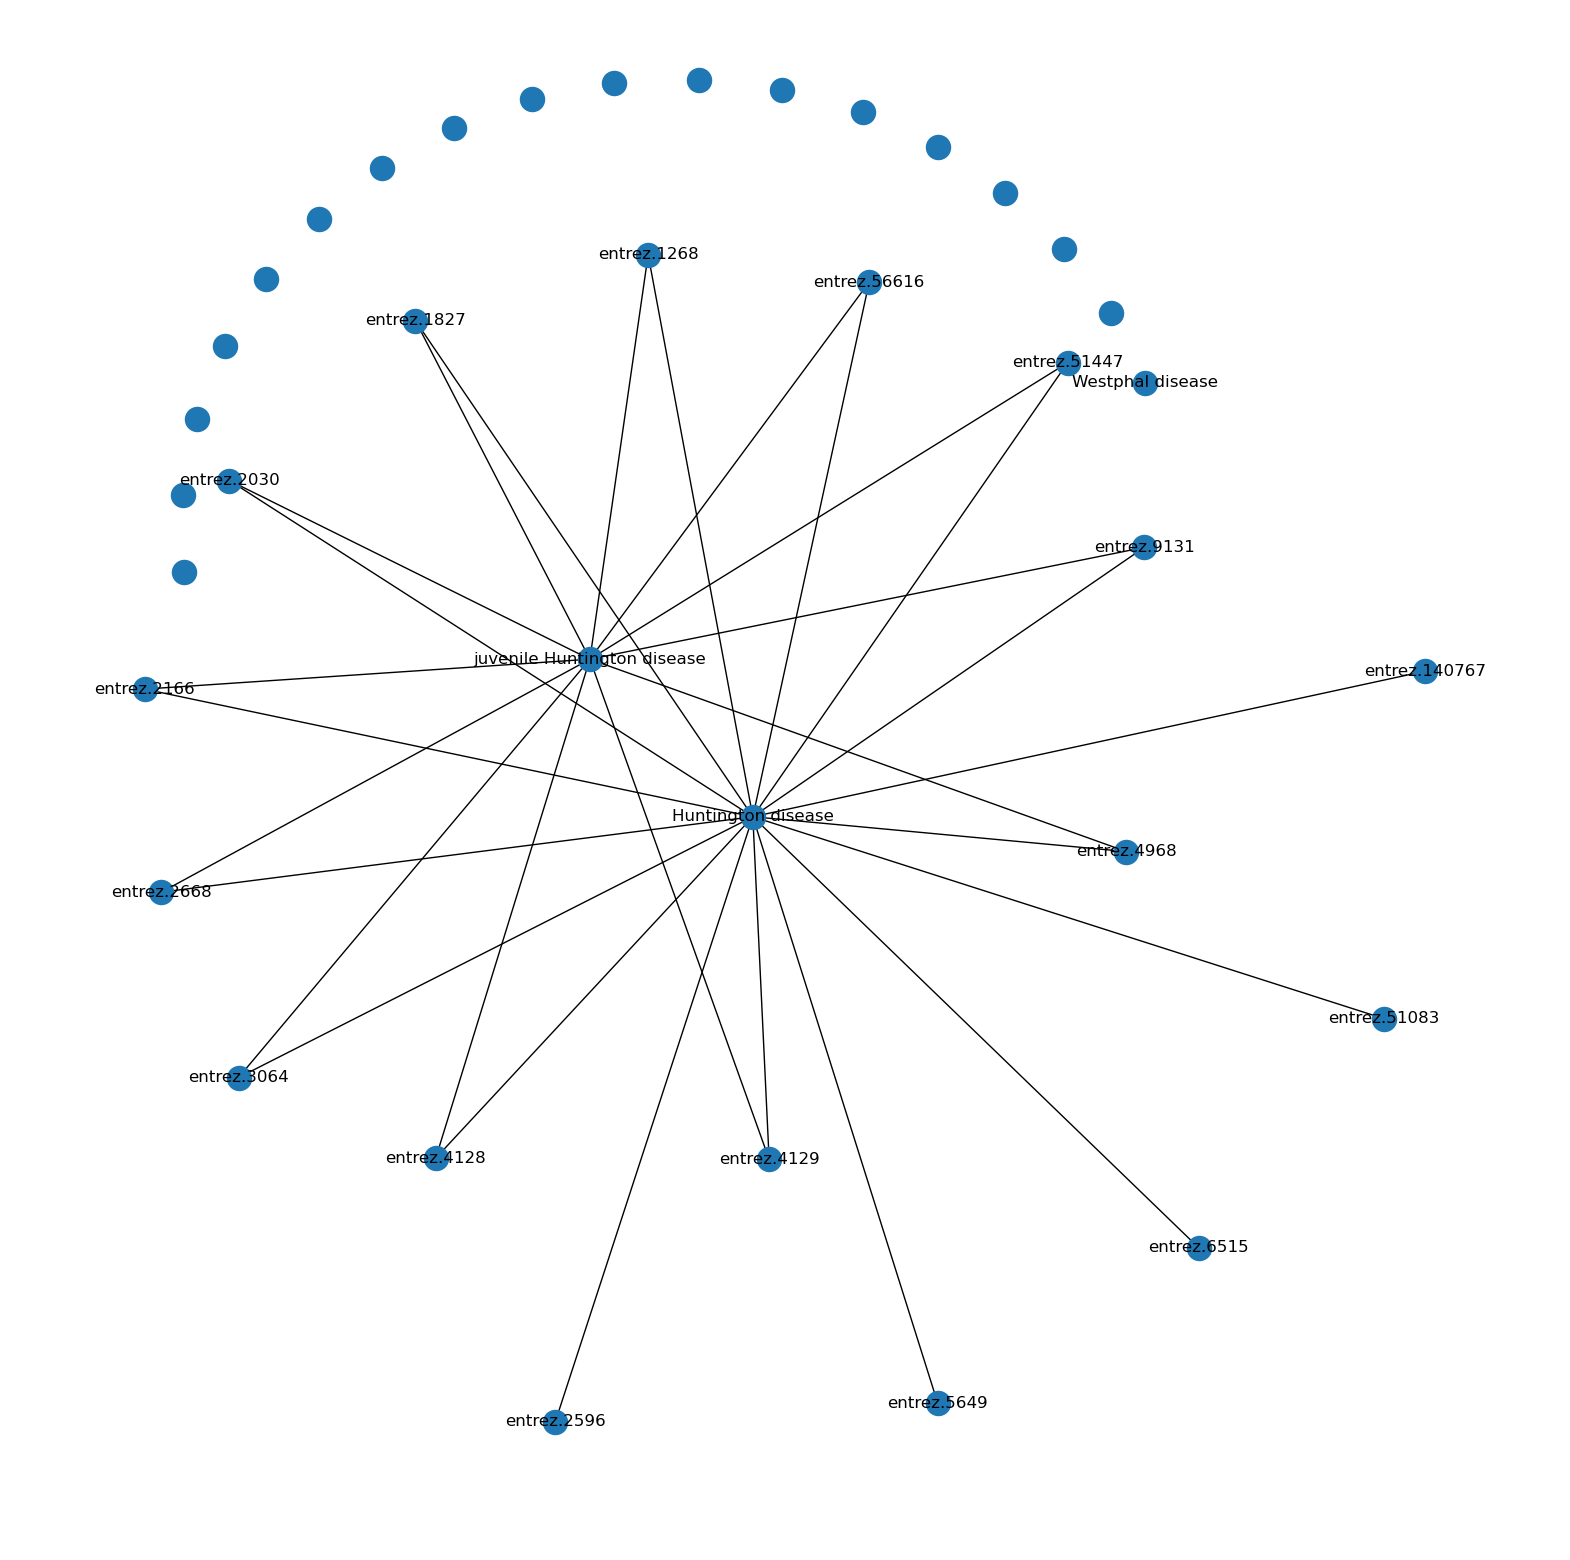

In [7]:
G = huntingtons_graph.to_networkx_graph()
print(f"Created Huntington's graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
huntingtons_graph.plot_network()

In [8]:
#TODO Bonus Task B.2: Create a new execution chain that includes the protein_interaction layer adding.
huntingtons_graph_with_ppi = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer()

Getting Huntingtons disease nodes...


26363it [00:14, 1792.12it/s]


Acquired 3 disorder nodes

Getting connected gene node ids...


48511it [00:10, 4493.22it/s]

Found 58 connections


In [9]:
#TODO Bonus Task B.3: How much larger is the new network? Compare which drugs are now additionally found that have not been linked to.

additional_drugs = []

for drug in additional_drugs:
    print("Drug ID:", drug["primaryDomainId"])
    for key in drug.keys():
        print(f"\t{key}: {drug[key]}")
    print("\n")



### 🔍 Solution 3 (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:


Task 3: Construct a network, that lets you see drugs, that are targeting proteins associated with Huntington's disorder:



Solution 3.1: Transfer the disorder_filter function from Task 2.1 (or Solution 2.1 ) into the NedrexGraph Class!
```python
def _filter_disorders(self, disorder_node) -> bool:
    return disorder_node["primaryDomainId"] in omim_ids
```

**Explanation**:
- A simple check if the "primaryDomainId" of the current node is in the list of requested IDs, is sufficient

Solution 3.2: Adjust the protein filter function, that it also filters out all proteins that are not reviewed
```python
def _filter_proteins(self, protein_node) -> bool:
    if protein_node["primaryDomainId"] not in self.filtered_proteins.keys():
        return False
    return protein_node.get("is_reviewed","False") == "True"
```

Solution 3.3: Use the cell below the class definition cell and chain the available add_... and load_... functions in a way, that a network, that fulfills Task 3 is created

```python
huntingtons_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()
```

</details>

### 🔍 Solution Bonus Task (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:

**Bonus Task: Add a ProteinInteractionLayer**:


 Solution B.1: Complete the function for importing the protein_interaction edges from file, filtering, and storing them correctly.

```python
def add_protein_interaction_layer(self):
    print("Reading ppi information from previous file...")
    new_proteins = set()
    with open("../../data/NeDRex_api/filtered_ppi_only_reviewed_proteins_solution.csv", "r") as fr:
        for line in fr.readlines():
            if "," in line:
                ppi = line.strip().split(",")
                ## skip ###
                if ppi[0] == ppi[1]:
                    continue
                protein_id_1 = f"uniprot.{ppi[0]}"
                protein_id_2 = f"uniprot.{ppi[1]}"
                protein_id_1_present = protein_id_1 in self.filtered_proteins.keys()
                protein_id_2_present = protein_id_2 in self.filtered_proteins.keys()
                if protein_id_1_present or protein_id_2_present:
                    self.protein_protein_edges.append((protein_id_1, protein_id_2))
                    if protein_id_1_present:
                        new_proteins.add(protein_id_2)
                    if protein_id_2_present:
                        new_proteins.add(protein_id_1)
                ## skip until here ##
    for new_protein in new_proteins:
        self.filtered_proteins[new_protein] = None
    print(f"Added {len(new_proteins)} protein IDs through PPI")
    return self
```


Solution B.2: Create a new execution chain that includes the protein_interaction layer adding.

```python
huntingtons_graph_with_ppi = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().add_protein_interaction_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()

```


Solution B.3: How much larger is the new network? Compare which drugs are now additionally found that have not been linked to Huntington's disease before!

```python
huntingtons_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()
G_without_ppi = huntingtons_graph.to_networkx_graph()
print(f"Created Huntington's graph without PPI Layer with {G_without_ppi.number_of_nodes()} nodes and {G_without_ppi.number_of_edges()} edges")

huntingtons_graph_with_ppi = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().add_protein_interaction_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()
G_with_ppi= huntingtons_graph_with_ppi.to_networkx_graph()
print(f"Created Huntington's graph with PPI Layer with {G_with_ppi.number_of_nodes()} nodes and {G_with_ppi.number_of_edges()} edges")

additional_drugs = [v for k,v in huntingtons_graph_with_ppi.filtered_drugs.items() if k in huntingtons_graph.filtered_drugs.keys()]
for drug in additional_drugs:
    print("Drug ID:", drug["primaryDomainId"])
    for key in drug.keys():
        print(f"\t{key}: {drug[key]}")
    print("\n")
```
</details>